In [ ]:
!pip install keras --upgrade tensorflow --upgrade

In [1]:
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.utils import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN, Dense, LSTM, Bidirectional

In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

In [3]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = pad_sequences(x_train, maxlen = maxlen)
x_test = pad_sequences(x_test, maxlen = maxlen)

In [ ]:
model_rnn = Sequential([
    Embedding(max_features, 64),
    SimpleRNN(64),
    Dense(1, activation='sigmoid')
])

model_rnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_rnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn (SimpleRNN)               │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_rnn.fit(x_train, y_train, epochs = 5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 43s 292ms/step - accuracy: 0.5912 - loss: 0.6549 - val_accuracy: 0.8140 - val_loss: 0.4310
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 38s 270ms/step - accuracy: 0.8553 - loss: 0.3449 - val_accuracy: 0.6793 - val_loss: 0.5855
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 266ms/step - accuracy: 0.8913 - loss: 0.3054 - val_accuracy: 0.8260 - val_loss: 0.4132
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 40s 258ms/step - accuracy: 0.9781 - loss: 0.0842 - val_accuracy: 0.8357 - val_loss: 0.4528
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 36s 262ms/step - accuracy: 0.9951 - loss: 0.0284 - val_accuracy: 0.8157 - val_loss: 0.5624


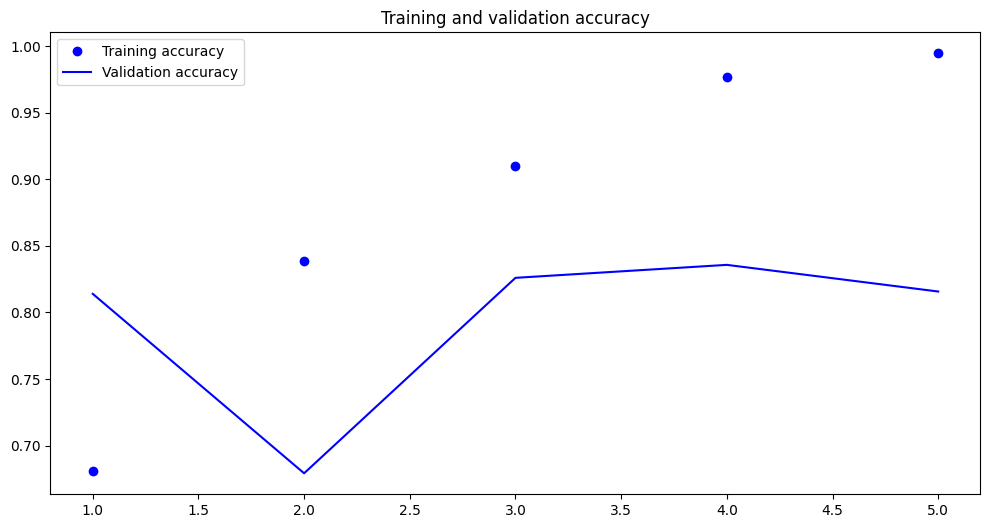

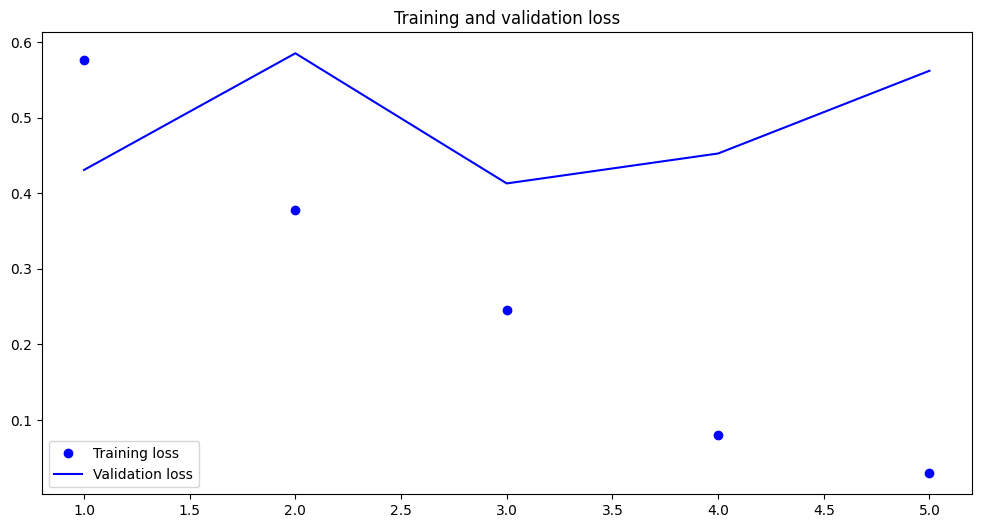

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,6))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predictions = model_rnn.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
  print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_rnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 26s 33ms/step - accuracy: 0.8102 - loss: 0.5696
Test Loss: 0.5651150345802307
Test Accuracy: 0.8109599947929382


In [ ]:
model_lstm = Sequential([
    Embedding(max_features, 64),
    LSTM(64),
    Dense(1, activation='sigmoid')
])

In [ ]:
model_lstm.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_lstm.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_lstm.fit(x_train, y_train, epochs = 5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.6273 - loss: 0.6281 - val_accuracy: 0.8311 - val_loss: 0.3873
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 201s 1s/step - accuracy: 0.8838 - loss: 0.2925 - val_accuracy: 0.8300 - val_loss: 0.3863
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 142s 1s/step - accuracy: 0.9244 - loss: 0.2083 - val_accuracy: 0.8767 - val_loss: 0.3026
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - accuracy: 0.9511 - loss: 0.1466 - val_accuracy: 0.8651 - val_loss: 0.3645
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step - accuracy: 0.9492 - loss: 0.1454 - val_accuracy: 0.8685 - val_loss: 0.3742


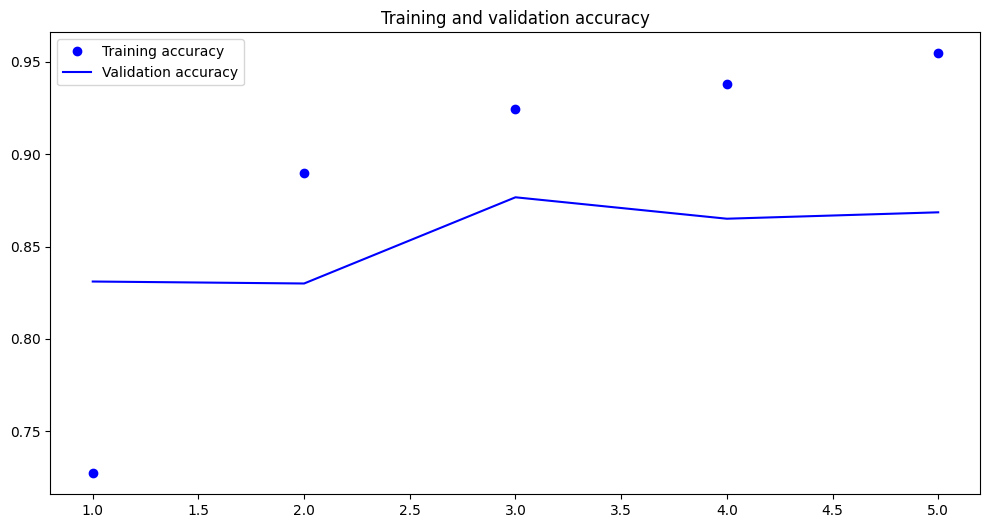

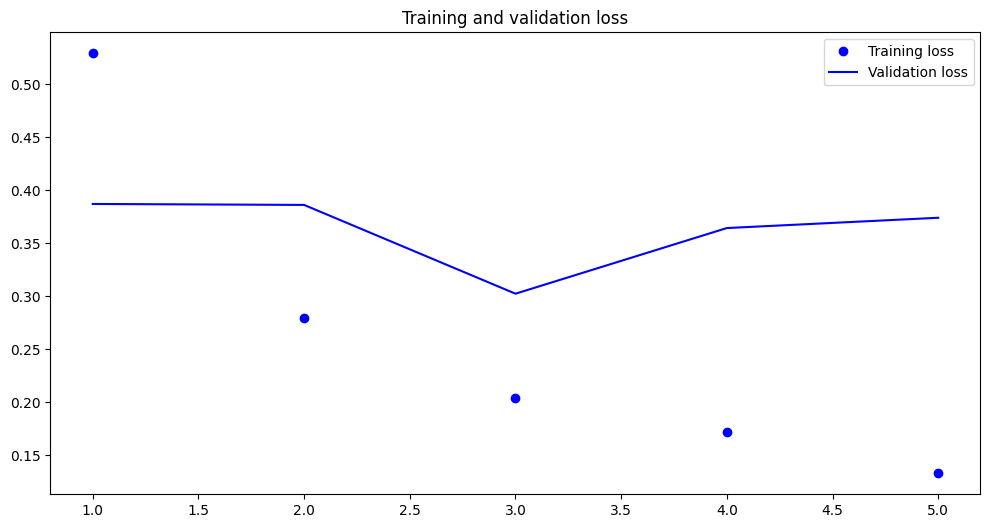

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,6))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
predictions = model_lstm.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
  print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_lstm.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 59s 76ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 74ms/step - accuracy: 0.8551 - loss: 0.4100
Test Loss: 0.4116627275943756
Test Accuracy: 0.8541600108146667


In [5]:
model_brnn = Sequential([
    Embedding(max_features, 64),
    Bidirectional(LSTM(64, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
    ])

In [6]:
model_brnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
model_brnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model_brnn.fit(x_train, y_train, epochs = 5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 488s 4s/step - accuracy: 0.6282 - loss: 0.6168 - val_accuracy: 0.8571 - val_loss: 0.3521
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 510s 4s/step - accuracy: 0.8851 - loss: 0.2903 - val_accuracy: 0.8848 - val_loss: 0.2931
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 498s 4s/step - accuracy: 0.9448 - loss: 0.1621 - val_accuracy: 0.8688 - val_loss: 0.3197
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 501s 4s/step - accuracy: 0.9654 - loss: 0.1023 - val_accuracy: 0.8328 - val_loss: 0.4000
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 482s 4s/step - accuracy: 0.9684 - loss: 0.1016 - val_accuracy: 0.8655 - val_loss: 0.3879


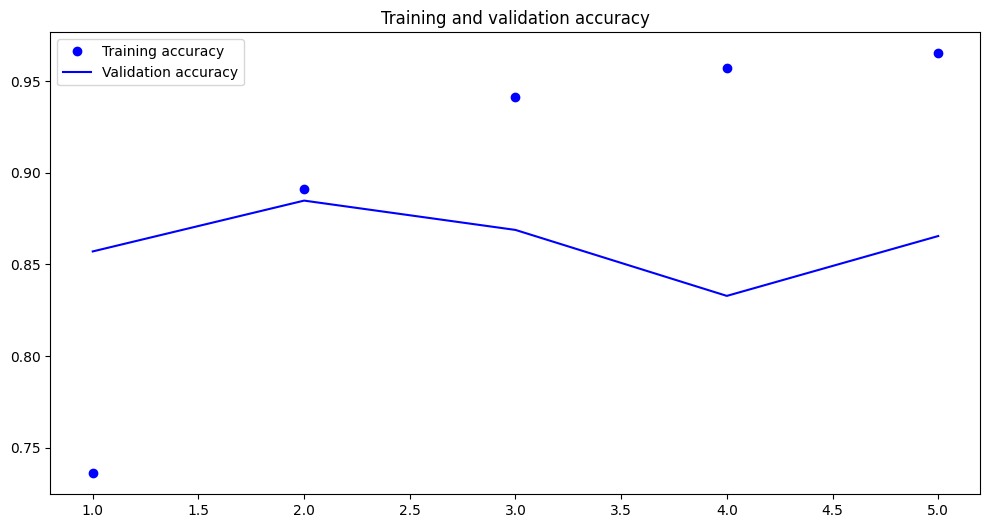

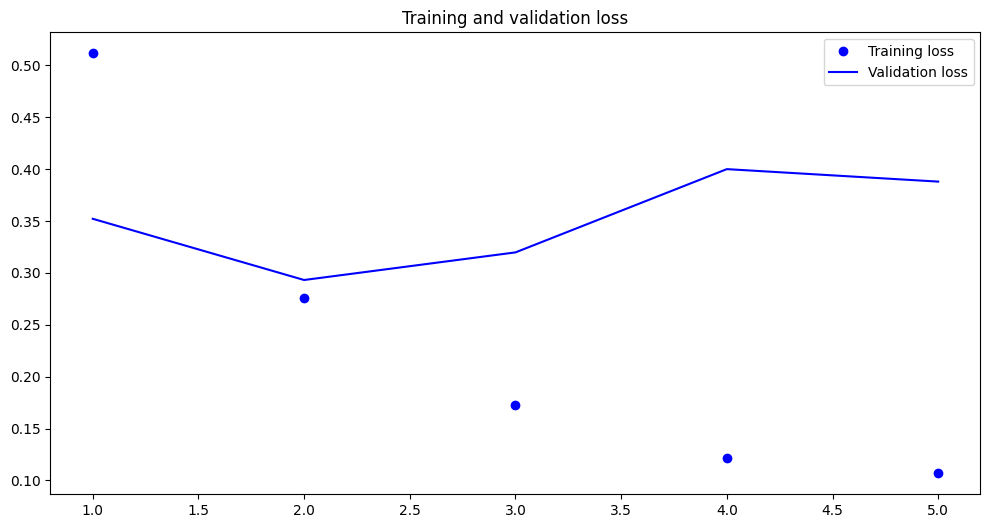

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,6))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [7]:
predictions = model_brnn.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
  print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_brnn.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 164s 205ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 0, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 163s 206ms/step - accuracy: 0.5101 - loss: 0.6930
Test Loss: 0.6932072639465332
Test Accuracy: 0.5015599727630615


In [20]:
model_deep = Sequential([
    Embedding(max_features, 64),
    Bidirectional(LSTM(32, return_sequences=True)),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

In [21]:
model_deep.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [22]:
model_deep.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model_deep.fit(x_train, y_train, epochs=5, batch_size=128, validation_split=0.3)

Epoch 1/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - acc: 0.6633 - loss: 0.5734 - val_acc: 0.8609 - val_loss: 0.3324
Epoch 2/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - acc: 0.9133 - loss: 0.2325 - val_acc: 0.8791 - val_loss: 0.3117
Epoch 3/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 199s 1s/step - acc: 0.9392 - loss: 0.1736 - val_acc: 0.8733 - val_loss: 0.3189
Epoch 4/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 221s 2s/step - acc: 0.9587 - loss: 0.1199 - val_acc: 0.8697 - val_loss: 0.3766
Epoch 5/5
137/137 ━━━━━━━━━━━━━━━━━━━━ 219s 2s/step - acc: 0.9729 - loss: 0.0829 - val_acc: 0.8755 - val_loss: 0.4169


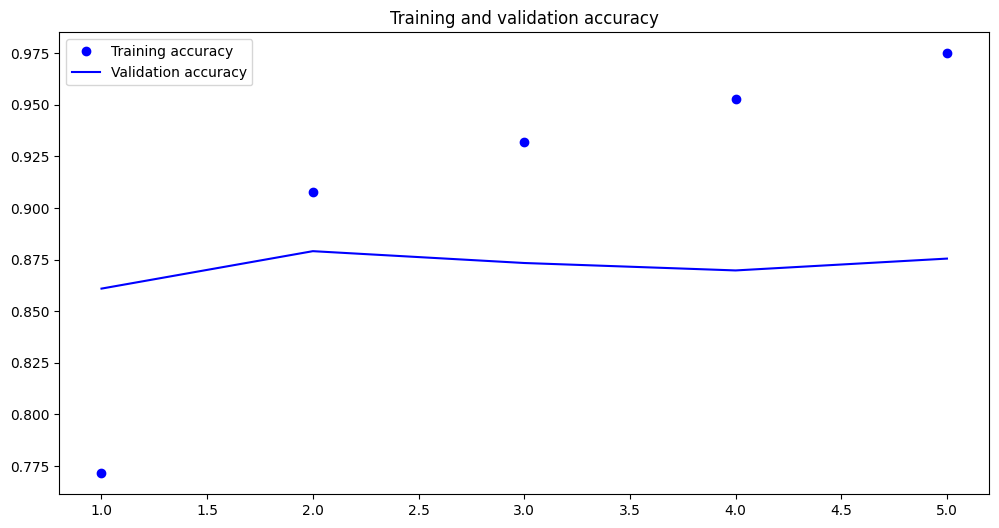

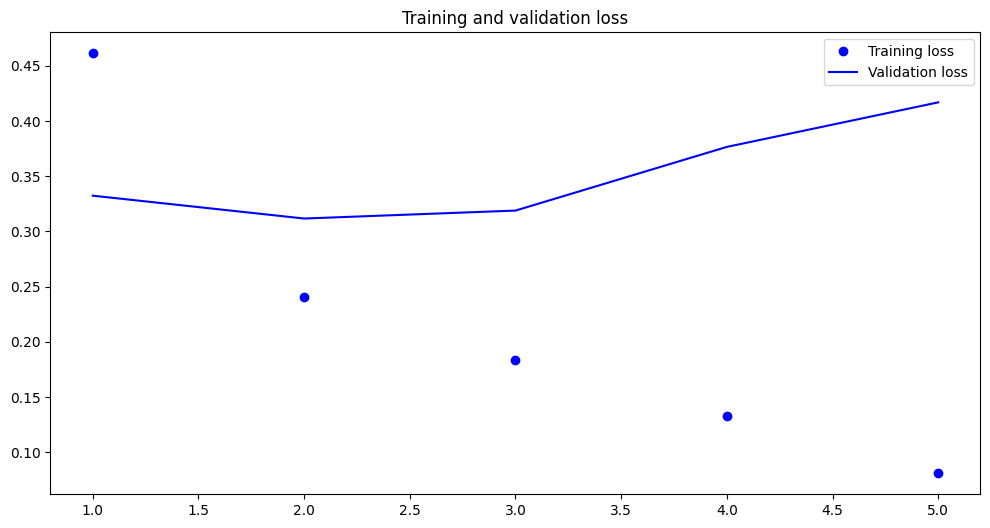

In [27]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,6))

plt.plot(epochs, acc, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(12,6))

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

In [28]:
predictions = model_deep.predict(x_test)

binary_predictions = [1 if pred > 0.5 else 0 for pred in predictions]

for i in range(10):
  print(f"Прогнозоване: {binary_predictions[i]}, Фактичне: {y_test[i]}")

test_loss, test_acc = model_deep.evaluate(x_test, y_test)
print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

782/782 ━━━━━━━━━━━━━━━━━━━━ 120s 152ms/step
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 1
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 1, Фактичне: 1
Прогнозоване: 0, Фактичне: 0
Прогнозоване: 1, Фактичне: 0
Прогнозоване: 1, Фактичне: 1
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 153ms/step - acc: 0.8629 - loss: 0.4536
Test Loss: 0.4469537138938904
Test Accuracy: 0.8640400171279907
